# Module 2 Exercise 1 - Effect of exercise on low level inflammation
## Overview
In this exercise, you will perform a repeated measures analysis on data studying the effect of an exercise training program on the reduction of C_Reactive Protien, a biomarker for long-term, low-level inflammation.

## File Format
The data are located in the resources subfolder of module 2, in a file named heart-disease.csv.

Documentation on the dataset is [here](../resources/heart-disease.txt).

## Required Output
You will respond to the questions located in the Quiz for this exercise in the Canvas site for this course.

## Grading
There are two parts to submission of this exercise. The first is submission of this notebook, and is worth 10 points. Not submitting code will result in a loss of 10 points. Submitting code that is not functional will result in a loss of 5 points.  Using an incorrect model will cause a deduction of 1-5 points depending upon how different the model is from the correct model.

There are three charts that must be displayed in this notebook.  Failure to display a chart will result in a deduction of 1 point.  If the chart is not functionally correct, 0.5 points will be deducted.  Functionally correct means that the data plotted in the charts are accurate, the correct variables are plotted, and the variables are plotted on the specifed axes. The look, size, and colors in the plot will not be graded.

The second part of the exercise is submission of the answers via the associated Canvas quiz. Each correct answer on the Canvas Quiz is worth 2 points.

Any numeric answer typed into Canvas will be considered correct if it is within  ±  1% from the reference answer. Answers in which you select a given choice will be graded based on the identified correct choice(s). For multi-select, partial credit is given if a portion of the correct answers are selected.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install pingouin==0.3.9
import pingouin as pg

pd.set_option('display.max_rows', None)

     |████████████████████████████████| 225kB 3.6MB/s eta 0:00:01
     |████████████████████████████████| 38.1MB 514kB/s  eta 0:00:01   |██▍                             | 2.9MB 4.2MB/s eta 0:00:09     |██████████████▏                 | 16.9MB 4.2MB/s eta 0:00:06
     |████████████████████████████████| 18.1MB 8.3MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 235kB 17.2MB/s eta 0:00:01
     |████████████████████████████████| 849kB 49.3MB/s eta 0:00:01
  Created wheel for statsmodels: filename=statsmodels-0.13.1-cp37-cp37m-linux_x86_64.whl size=18154907 sha256=0143ee0678f27f086ccd99ba780bcb1a00bd205dca9c345b2a1005f79366b4f5
  Stored in directory: /home/dcphw2/.cache/pip/wheels/4f/31/b9/64e28192ca2d2a9aa276d5ec3ecadcf90069bacea1cb6a80ad
Successfully built statsmodels
  Created wheel for pingouin: filename=pingouin-0.3.9-cp37-none-any.whl size=223376 sha256

/opt/conda/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.9, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## Load data

In [4]:
# your code here

data = pd.read_csv('../resources/heart-disease.csv')

data

,id,time,crp
0,1,1,5.0
1,1,2,4.5
2,1,3,4.0
3,2,1,4.0
4,2,2,3.7
5,2,3,3.7
6,3,1,3.8
7,3,2,3.6
8,3,3,3.1
9,4,1,3.5


## Quiz 2 Question 1
When repeated measures data contain a dependent variable that is categorical, the appropriate method for analysis is:

A. Repeated Measures ANOVA

B. Logistic Regression

C. Generalized Estimating Equations

D. Generalized Linear Models

## Quiz 2 Question 2
When selecting a distribution for a Generalized Estimating Equation when the dependent variable is categorical, which distribution should be selected?

A. Normal (Gaussian)

B. Poisson

C. Binomial

## Quiz 2 Question 3
In a Generalized Estimating Equation, which correlation structure would be most appropriate for data that is related to a prior time point's data?

A. Independent

B. Exchangeable

C. Autoregressive 

D. Unstructured 

## Quiz 2 Question 4
Appropriate methods to analyze the heart-disease data are:

A. Repeated Measures ANOVA

B. Logistic Regression

C. Generalized Estimating Equations

D. Generalized Linear Models

## Check the distribution of the crp data
Plot a histogram of the CRP data

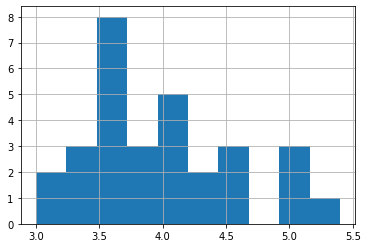

In [5]:
# your code here

data['crp'].hist()

## Apply an appropriate transformation to make the data more normal
Replot a histogram after the transformation

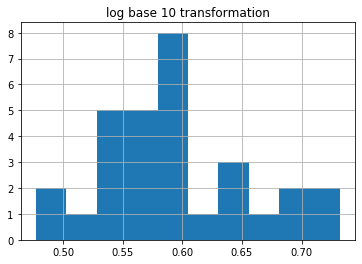

In [6]:
# your code here

data['crp_trans'] = np.log10(data['crp'])
data['crp_trans'].hist()
plt.title('log base 10 transformation')
plt.show()

## Quiz 2 Question 5
The data for CRP meets the assumption of sphericity at $\alpha$ = 0.05.

In [8]:
# your code here

pg.sphericity(data, dv='crp_trans', subject='id', within='time', alpha=0.05)

/opt/conda/lib/python3.7/site-packages/pingouin/distribution.py:950: RuntimeWarning: divide by zero encountered in double_scalars
  W = np.product(eig) / (eig.sum() / d)**d


SpherResults(spher=True, W=inf, chi2=-inf, dof=2, pval=1.0)

## Quiz 2 Question 6
Run the appropriate model to test for the within subject p-value of the dependent variable CRP.  Do we reject the Null hypothesis that the within subject means are all equal at $\alpha$ = 0.05?

In [9]:
# your code here

pg.rm_anova(data=data, dv='crp_trans', subject='id', within='time')

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,time,2,18,26.095353,0.000005,0.743556,0.631742


## Display a line chart showing the mean CRP values for the three time points
Display the CRP value on the y axis, and the time point on the x axis.

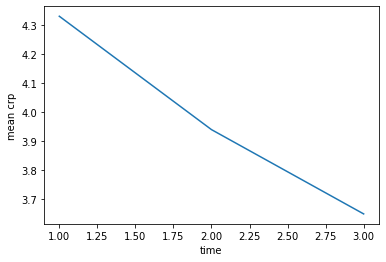

,id,crp,crp_trans
time,,,
1,5.5,4.33,0.632315
2,5.5,3.94,0.591365
3,5.5,3.65,0.559729


In [30]:
# your code here

import matplotlib.pyplot as plt

df = data.groupby(['time']).mean()

plt.plot(df.index,df['crp'])
plt.xlabel('time')
plt.ylabel('mean crp')
plt.show()

df